In [ ]:
import pandas as pd
import wooldridge as woo
df = woo.data("401k")
df.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405
...,...,...,...,...,...,...,...,...
1529,85.099998,0.33,553.0,650.0,24,907.0,0,6.810143
1530,100.000000,2.52,142.0,142.0,17,197.0,1,5.283204
1531,100.000000,2.27,1928.0,1928.0,35,2171.0,0,7.682943
1532,100.000000,0.58,166.0,166.0,8,931.0,1,6.836259


In [ ]:
import pandas as pd
df['veri'] = (df['totpart'] / df['totelg']) * 100

In [ ]:
df_veri = df[['prate','veri']]
df_veri.head()

In [ ]:
filt = (df_veri['veri'] > df_veri['prate'] + 0.1) | (df_veri['veri'] < df_veri['prate'] - 0.1)
selected_rows = df_veri[filt]
df_veri = df_veri[filt]
df_veri.head()

,prate,veri


In [ ]:
totemp2_values = []

for index, row in df.iterrows():
    if row['sole'] == 1:
        totemp2_values.append(row['totemp'])
    else:
        totemp2_values.append(row['totemp'] * row['prate'] / 100)

df['totemp2'] = totemp2_values


In [ ]:
df['sole'] = df['sole'].astype('category')
df['sole'] = df['sole'].cat.rename_categories({0: 'no', 1: 'yes'})

In [ ]:
relative_frequency_table = df['sole'].value_counts(normalize=True)

print("Relative Frequency Distribution Table for 'sole':")
print(relative_frequency_table)


Relative Frequency Distribution Table for 'sole':
no     0.512386
yes    0.487614
Name: sole, dtype: float64


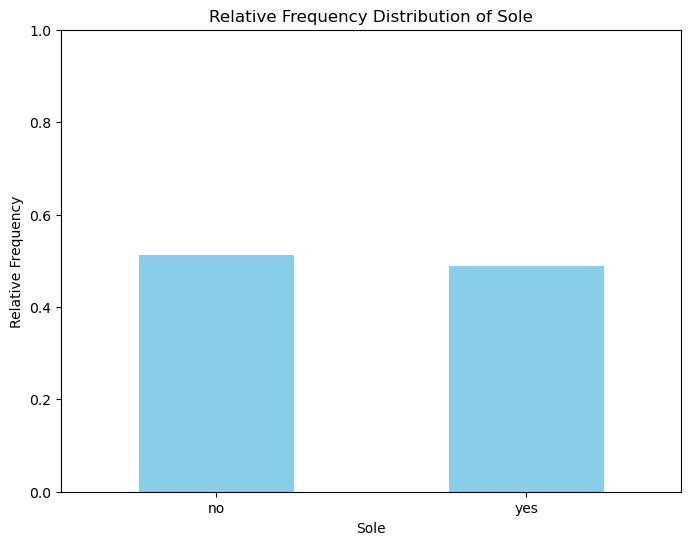

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
relative_frequency_table.plot(kind='bar', color='skyblue')
plt.xlabel('Sole')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency Distribution of Sole')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


In [ ]:
import numpy as np

mean_prate = np.mean(df['prate'])
std_dev_prate = np.std(df['prate'], ddof=1)
percentiles = np.percentile(df['prate'], [25, 50, 75])

# Print the results
print("Mean of prate:", mean_prate)
print("Sample Standard Deviation of prate:", std_dev_prate)
print("25th Percentile of prate:", percentiles[0])
print("50th Percentile (Median) of prate:", percentiles[1])
print("75th Percentile of prate:", percentiles[2])


Mean of prate: 87.3629074562948
Sample Standard Deviation of prate: 16.7165373770131
25th Percentile of prate: 78.02499961853027
50th Percentile (Median) of prate: 95.6999969482422
75th Percentile of prate: 100.0


In [ ]:
import pandas as pd
df['prate_cat'] = pd.cut(df['prate'], bins=5)

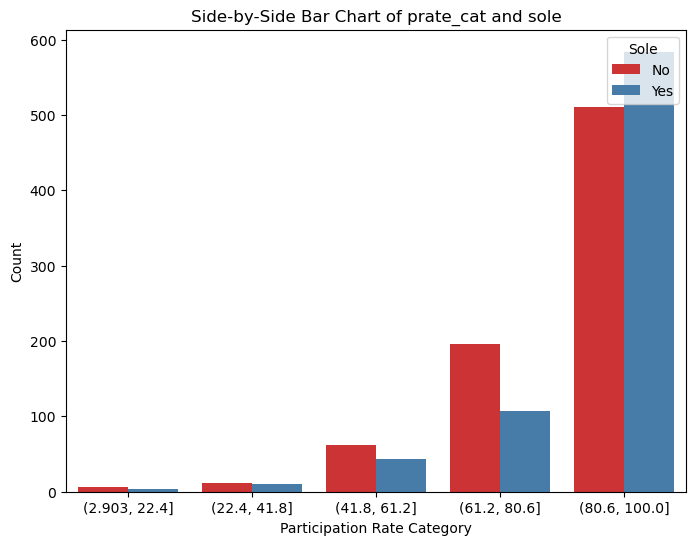

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "df" with "prate_cat" and "sole" columns

# Create the side-by-side bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='prate_cat', hue='sole', palette='Set1')
plt.xlabel('Participation Rate Category')
plt.ylabel('Count')
plt.title('Side-by-Side Bar Chart of prate_cat and sole')
plt.legend(title='Sole', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


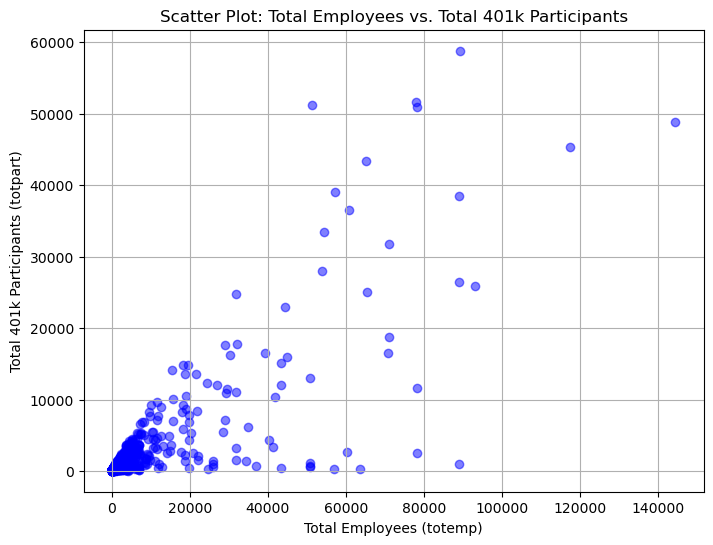

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['totemp'], df['totpart'], alpha=0.5, color='b')
plt.xlabel('Total Employees (totemp)')
plt.ylabel('Total 401k Participants (totpart)')
plt.title('Scatter Plot: Total Employees vs. Total 401k Participants')
plt.grid(True)
plt.show()

### the relationship between total number of firm employees (totemp) and total 401k participants (totpart) is a positve relationship demonstrated by the upwards trend in the graph

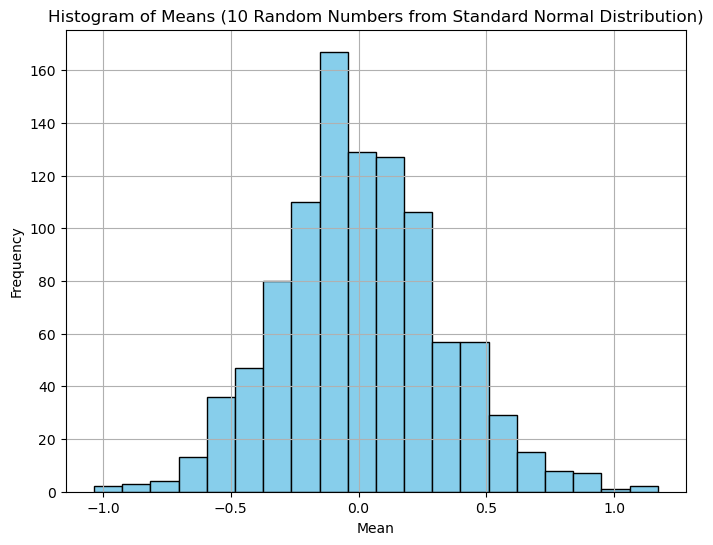

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean_list = []

num_repetitions = 10

for _ in range(num_repetitions):
    random_numbers = np.random.randn(10)  # Generate 10 random numbers from a standard normal distribution
    mean = np.mean(random_numbers)  # Calculate the mean
    mean_list.append(mean)  # Append the mean to the list

# Create a histogram of the means
plt.figure(figsize=(8, 6))
plt.hist(mean_list, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Means (10 Random Numbers from Standard Normal Distribution)')
plt.grid(True)
plt.show()


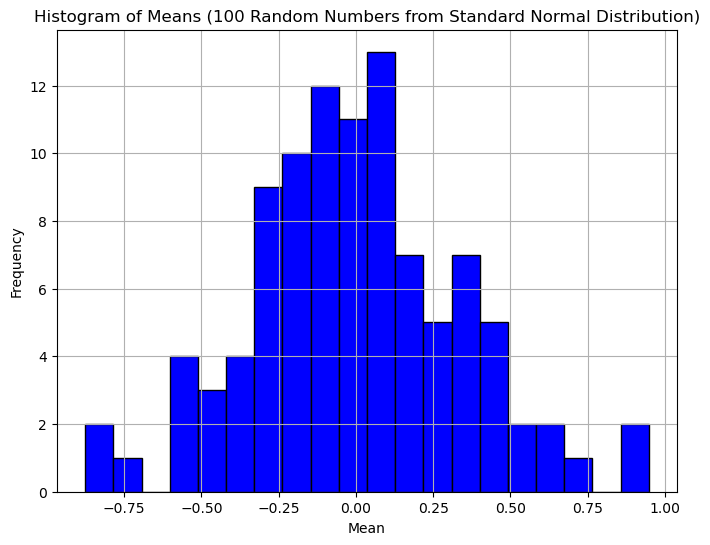

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean_list = []

num_repetitions = 100

for _ in range(num_repetitions):
    random_numbers = np.random.randn(10)  # Generate 10 random numbers from a standard normal distribution
    mean = np.mean(random_numbers)  # Calculate the mean
    mean_list.append(mean)  # Append the mean to the list

# Create a histogram of the means
plt.figure(figsize=(8, 6))
plt.hist(mean_list, bins=20, color='blue', edgecolor='black')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Means (100 Random Numbers from Standard Normal Distribution)')
plt.grid(True)
plt.show()

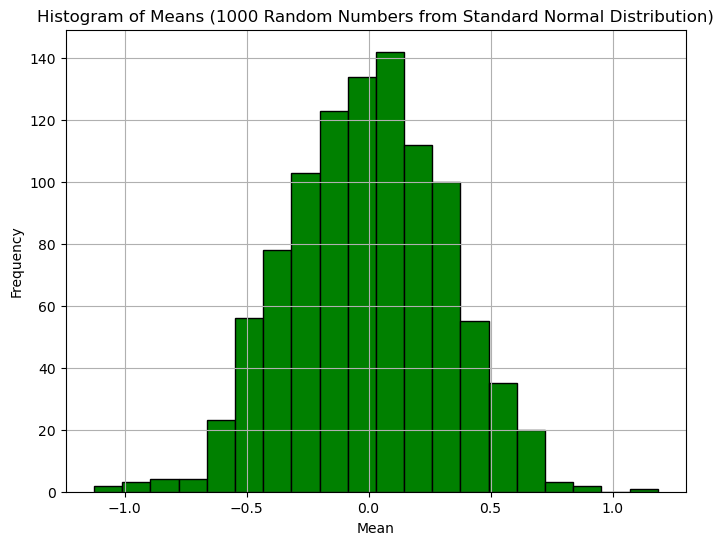

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean_list = []

num_repetitions = 1000

for _ in range(num_repetitions):
    random_numbers = np.random.randn(10)  # Generate 10 random numbers from a standard normal distribution
    mean = np.mean(random_numbers)  # Calculate the mean
    mean_list.append(mean)  # Append the mean to the list

# Create a histogram of the means
plt.figure(figsize=(8, 6))
plt.hist(mean_list, bins=20, color='green', edgecolor='black')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Means (1000 Random Numbers from Standard Normal Distribution)')
plt.grid(True)
plt.show()